<h2><center> Quantitative Trading Strategies - Assignment 3 </center></h2>

<h3><span style="color:#00008B">Submitted by - Krishna Vardhan Diggavi </span></h3>

<h3><span style="color:#00008B">Email - krishnadiggavi@uchicago.edu</span></h3>

- In this assignment we are going to implement a trading strategy based on Quantile strategy. Here is the brief info about the strategy. <br>

# Quantile Strategy

### Description:<br>
- Quantile strategies, also known as cross-sectional or relative value strategies, are a type of investment strategy that involves dividing a set of financial assets or securities into groups, or quantiles, based on a certain characteristic or metric. The most common characteristic used to divide assets into quantiles is their historical performance, such as their returns." <br><br>
- They can take many forms, but they generally involve investing in assets in the top quantile (or decile) and avoiding or shorting assets in the bottom quantile. There are many variations of this basic strategy, such as reversing positions, equal weighting assets within a quantile, or using a combination of different characteristics to define the quantiles.<br> <br>
- They are based on the idea that there are persistent differences in the risk and return characteristics of financial assets, and that these differences can be exploited through relative value investments. However, it is important to note that these strategies may not produce consistent returns over time and can be influenced by market conditions and other factors. <br><br>

### Advantages:<br>
- Diversification: By dividing a set of assets into quantiles, a quantile strategy can provide a diversified portfolio that is less exposed to the risks associated with a single asset or a small group of assets..<br><br>

- Risk management: Quantile strategies can be used to manage portfolio risk by investing in assets with lower risk and avoiding or shorting assets with higher risk.<br><br>

- Return enhancement: Quantile strategies can potentially provide higher returns than a traditional buy-and-hold strategy, by investing in assets that are undervalued or have strong performance momentum.<br><br>

- Adaptability: Quantile strategies can be adapted to different market conditions and investment objectives. They can be used in both bullish and bearish market conditions.<br><br>
- Backtesting: Quantile strategies can be backtested to evaluate their historical performance, which can provide valuable information about the risk and return characteristics of the strategy.. <br><br>


### Disadvantages:<br>
- Limited ability to predict future performance: Quantile strategies rely on historical data, which may not accurately predict future performance of the assets.<br><br>

- Market conditions: Quantile strategies may not perform well during certain market conditions or in certain sectors.<br><br>

- Overfitting: Quantile strategies may be overfitted to historical data, which can lead to poor performance in live trading.<br><br>

- Costs: Quantile strategies can be costly to implement, as they may require trading large numbers of securities, which can generate significant transaction costs.<br><br>
- Shorting: Some Quantile strategies rely on shorting, which may not be suitable for all investors and can also be costly..<br><br>



### How to tackle disadvantages:<br>

- Proper asset selection: Carefully selecting the assets for the strategy can help to mitigate the risks associated with market conditions or certain sectors. This can include conducting thorough fundamental and technical analysis, and focusing on assets that are undervalued or have strong performance momentum..<br><br>

- Backtesting and forward testing: Backtesting and forward testing can help to evaluate the performance of a quantile strategy under different market conditions. This can also help to identify any potential overfitting or data-snooping bias.<br><br>

- Risk management: Proper risk management is crucial for any investment strategy, including quantile strategies. This can include setting stop-loss levels, diversifying the portfolio, and monitoring the portfolio on a regular basis.<br><br>

- Cost-effective: To minimize the transaction costs, the strategy can be implemented with ETFs or index funds rather than individual stocks.<br><br>

- Combining strategies: By combining different strategies, an investor can create a more well-rounded portfolio that can perform well in different market conditions.<br><br>


# Import Functions

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import quandl
import math
from functools import reduce
from datetime import date, timedelta
import pandas_datareader as dr
from scipy.stats import zscore
plt.rcParams['figure.figsize']=[15, 6]
from scipy.stats import zscore

In [4]:
quandl.ApiConfig.api_key = 'nVwoRNxyU88t5sMKgzAt'

# Importing data from Zacks Fundamentals Collection

### Description:<br>
- ZACKS/FC: This table contains over 200 fundamental indicators for over 19,500 companies including over 10,000 delisted stocks. For access to additional indicators see Zacks Fundamentals C. <br><br>
- ZACKS/FR: This table contains 26 fundamental ratios for over 19,500 companies, including over 10,000 delisted stocks.<br> <br>
- ZACKS/MT: This table contains descriptive information about all tickers that are included in Zacks products. <br><br>
- ZACKS/MKTV: This table contains supplementary information to Zacks fundamentals, with updated values for market capitalization and enterprise value. Market cap is the total value of all of a company's outstanding stock. You calculate it by multiplying the current stock price by the number of shares owned by stockholders. <br><br>
- ZACKS/SHRS: This table contains supplementary information to Zacks fundamentals, with updated values for common shares outstanding and average diluted shares outstanding. Shares outstanding are the total number of shares issued by a corporation. <br><br>
- ZACKS/MT: This table contains descriptive information about all tickers that are included in Zacks products. <br><br>

### Challenges:<br>
- First I tried to extract all the data tables from quandle, combine them and then apply filters.  <br><br>
- But since these tables have huge amount of data, I was facing memory issues.<br> <br>
- So teh approach is I tried to apply filters at each stage and pass only those resulting tickers into next data extracting thereby handling memory issues. <br><br>
- Neverthless, ZACKS/FC still had memory issues so I donwloaded the data in csv file and then accesses the file through pandas for further steps.  <br><br>


### Lets go over extracting data from each of ZACKS database mentioned above. <br>

### Importing ZACKS MT data:<br>

- First we import ZACKS MT data from quandle.<br><br>
- We apply these filters - country as 'US', asset type as "COM" for equity. <br><br>
- We then exclude these sectors  automotive, financial and insurance by referring to sector code from ZACKS site. <br><br>
- As a result we will be having total of 4865 tickers after applying these filters. <br><br>

In [5]:
mydata = quandl.get_table('ZACKS/MT', paginate = True)
mydata = mydata[(mydata.country_code =='US')]
mydata = mydata[(mydata.asset_type =='COM')]
mydata = mydata[(mydata.active_ticker_flag =='Y')]
mydata = mydata[(mydata.zacks_x_sector_code!=13) & (mydata.zacks_x_sector_code!=5 )]
mydata = mydata[(mydata.zacks_x_sector_desc!='nan')]
mydata.ticker.nunique()


4864

In [6]:
mydata.head()

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,ticker_type,active_ticker_flag,comp_url,sic_4_code,...,per_end_month_nbr,mr_split_date,mr_split_factor,comp_cik,country_code,country_name,comp_type,optionable_flag,sp500_member_flag,asset_type
None,,,,,,,,,,,,,,,,,,,,,
1,ZYXI,ZYXI,Zynex,Zynex Inc.,NASDAQ,USD,S,Y,http://www.zynex.com,3845.0,...,12,2022-01-05,1.1,0000846475,US,UNITED STATES,1.0,Y,N,COM
3,ZYNE,ZYNE,Zynerba Pharmaceuticals,"Zynerba Pharmaceuticals, Inc.",NASDAQ,USD,S,Y,http://www.zynerba.com,2834.0,...,12,NaT,NaN,0001621443,US,UNITED STATES,1.0,Y,N,COM
8,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,S,Y,http://www.tjx.com,5651.0,...,1,2018-11-07,2.0,0000109198,US,UNITED STATES,1.0,Y,Y,COM
13,ZVIA,ZVIA,Zevia,Zevia PBC,NYSE,USD,S,Y,http://www.zevia.com,2086.0,...,12,NaT,NaN,0001854139,US,UNITED STATES,1.0,Y,N,COM
14,ZUO,ZUO,Zuora,"Zuora, Inc.",NYSE,USD,S,Y,http://www.zuora.com,7372.0,...,1,NaT,NaN,0001423774,US,UNITED STATES,1.0,Y,N,COM


### Importing ZACKS MT data:<br>

- Next we import ZACKS FR data from quandle.<br><br>
- For this, we pass only those resulting tickers we obtained from above step.<br><br>
- We then apply these filters - debt/market cap ratio is greater than 0.1 and per type as Q. <br><br>
- As a result we will be having total of 3103 tickers after applying these filters. <br><br>

In [8]:
data_fr = quandl.get_table('ZACKS/FR', ticker = list(mydata.ticker), paginate = True, per_end_date={'gte' : '2014-01-01', 'lte' : '2022-01-31'})
data_fr = data_fr[(data_fr.tot_debt_tot_equity > 0.1)]
data_fr = data_fr[(data_fr.per_type =='Q')]
data_fr.ticker.nunique()


3102

In [9]:
data_fr.head()

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,invty_turn,rcv_turn,day_sale_rcv,ret_equity,ret_tang_equity,ret_asset,ret_invst,free_cash_flow_per_share,book_val_per_share,oper_cash_flow_per_share
None,,,,,,,,,,,,,,,,,,,,,
0,ZYXI,ZYXI,Zynex,Zynex Inc.,NASDAQ,USD,2021-12-31,Q,None,2021,...,0.6816,1.4098,63.8379,12.0311,20.4230,6.6735,10.4824,0.1617,1.8603,0.1773
17,ZYXI,ZYXI,Zynex,Zynex Inc.,NASDAQ,USD,2017-09-30,Q,None,2017,...,3.7626,2.8311,31.7903,141.9355,142.6718,36.7647,138.8889,0.1244,0.0429,0.1284
31,ZYXI,ZYXI,Zynex,Zynex Inc.,NASDAQ,USD,2014-03-31,Q,None,2014,...,0.1990,0.4413,203.9564,-42.0379,-44.1996,-9.0239,-40.4369,-0.0004,0.1002,-0.0001
80,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2022-01-31,Q,None,2022,...,1.6933,21.9159,4.1066,15.6623,15.9186,3.3034,10.0472,1.6557,5.0822,2.5152
81,ZY,TJX,The TJX Companies,"The TJX Companies, Inc.",NYSE,USD,2021-10-31,Q,None,2022,...,1.3320,17.8566,5.0402,15.8733,16.1200,3.4020,10.4402,1.0129,5.3965,1.6015


### Importing ZACKS SH data:<br>

- Next we import ZACKS SH data from quandle.<br><br>
- For this, we pass only those resulting tickers we obtained from extracting FR data step.<br><br>

In [10]:
data_SH = quandl.get_table('ZACKS/SHRS', ticker = list(data_fr.ticker), paginate = True, per_end_date={'gte' : '2014-01-01', 'lte' : '2022-01-31'})
data_SH.head()

,ticker,m_ticker,comp_name,fye,per_type,per_end_date,active_ticker_flag,shares_out,avg_d_shares
None,,,,,,,,,
0,TJX,ZY,TJX COS INC NEW,1,Q,2022-01-31,Y,1192.88,1204.65
1,ZUO,ZUO,ZUORA INC,1,Q,2022-01-31,Y,128.06,127.10
2,ZS,ZS,ZSCALER INC,7,Q,2022-01-31,Y,140.08,140.51
3,ODC,Z67Z,OIL DRI CORP AM,7,Q,2022-01-31,Y,7.33,6.90
4,FL,Z,FOOT LOCKER INC,1,Q,2022-01-31,Y,100.37,100.60


### Importing ZACKS MKTV data:<br>

- Next we import ZACKS MKTV data from quandle.<br><br>
- For this, we pass only those resulting tickers we obtained from extracting FR data.<br><br>

In [11]:
data_MKTV = quandl.get_table('ZACKS/MKTV', ticker = list(data_fr.ticker), paginate = True, per_end_date={'gte' : '2014-01-01', 'lte' : '2022-01-31'})
data_MKTV.head()

,ticker,m_ticker,comp_name,fye,per_type,per_end_date,active_ticker_flag,mkt_val,ep_val
None,,,,,,,,,
0,TJX,ZY,TJX COS INC NEW,1,Q,2021-12-31,Y,90563.32,87125.59
1,ZUO,ZUO,ZUORA INC,1,Q,2021-12-31,Y,2327.53,2124.19
2,ZEUS,ZUES,OLYMPIC STEEL,12,Q,2021-12-31,Y,260.32,578.27
3,ZTS,ZTS,ZOETIS INC,12,Q,2021-12-31,Y,115456.89,118563.89
4,ZT,ZT,ZIMMER EGY ACQ,12,Q,2021-12-31,Y,417.88,416.25


### Merging all the extracts ZACKS data:<br>

- Once we obtained the above data, we merge them into single dataframe 'final' and keep only below columns for easy reference.<br><br>

In [12]:
final = data_fr[['ticker', 'per_end_date', 'tot_debt_tot_equity', 'ret_invst']].merge(data_SH[['ticker', 'per_end_date', 'shares_out']], how = 'outer')\
.merge(data_MKTV[['ticker', 'per_end_date', 'mkt_val']], how = 'outer').sort_values(by=['ticker', 'per_end_date']).dropna()
final.head()

,ticker,per_end_date,tot_debt_tot_equity,ret_invst,shares_out,mkt_val
52146,AA,2016-12-31,0.1877,-1.4143,182.93,5136.70
52145,AA,2017-03-31,0.1778,3.2103,184.23,6337.48
52144,AA,2017-06-30,0.1753,1.4350,184.24,6015.44
52143,AA,2017-09-30,0.1726,1.7786,185.02,8625.77
52142,AA,2017-12-31,0.2065,-0.0855,185.20,9976.78


### Data validation for all the quarters:<br>

- Now we filter for those filters where we have data available for all the quarter end dates in the date range. <br><br>
- As a result we will be having total of 614 tickers after applying these filters. <br><br>

In [13]:
t = final.groupby('ticker').filter(lambda x: len(x) == 32)
tickers = set(t['ticker'])
final = final[final['ticker'].apply(lambda x: x in tickers)]
final.ticker.nunique()

614

### Importing ZACKS FC data:<br>

- As mentioned, I am facing memory issues while extracting FC data from quandle as it has many columns.<br><br>
- Thus, I have downlaodded the csv file by passing the resulting tickers from above step. <br><br>


In [14]:
data_FC1 = quandl.export_table('ZACKS/FC', ticker = final.ticker.tolist(), per_end_date={'gte': '2014-01-01', 'lte' : '2022-01-31'})

In [15]:
df_FC = pd.read_csv(r'C:\Users\Krishna Diggavi\Downloads\ZACKS_FC_K\ZACKS_FC_2_c3ba4947f54ecaccb875991aee56095b.csv', usecols=['ticker', 'per_end_date','filing_date','net_lterm_debt', 'tot_lterm_debt', 'eps_diluted_net', 'basic_net_eps', 'per_type']) 
df_FC = df_FC[(df_FC.per_type =='Q')]
df_FC.head()

,ticker,per_end_date,per_type,filing_date,basic_net_eps,tot_lterm_debt,net_lterm_debt,eps_diluted_net
0,AAP,2021-12-31,Q,2022-02-15,1.31,1034.320,NaN,1.32
1,AAP,2021-09-30,Q,2021-11-16,2.70,1034.002,NaN,2.68
2,AAP,2021-06-30,Q,2021-08-24,2.76,1033.686,NaN,2.74
3,AAP,2021-03-31,Q,2021-06-02,2.83,1033.369,NaN,2.81
4,AAP,2020-12-31,Q,2021-02-22,1.66,1032.984,244.524,1.64


### Merging the final data and ZACKS FC data:<br>

- Once we obtained the above data, we merge final and ZACKS FC into single dataframe 'final1' .<br><br>

In [16]:
df_FC['per_end_date'] = pd.to_datetime(df_FC["per_end_date"]).dt.date
final["per_end_date"] = pd.to_datetime(final["per_end_date"]).dt.date
final1 = final.merge(df_FC[['ticker', 'per_end_date','filing_date','net_lterm_debt', 'tot_lterm_debt', 'eps_diluted_net', 'basic_net_eps', 'per_type']], how = 'outer')
final1.head()

,ticker,per_end_date,tot_debt_tot_equity,ret_invst,shares_out,mkt_val,filing_date,net_lterm_debt,tot_lterm_debt,eps_diluted_net,basic_net_eps,per_type
0,AAP,2014-03-31,1.2436,4.0270,72.93,9225.27,2014-05-28,NaN,2001.740,2.01,2.02,Q
1,AAP,2014-06-30,1.0297,3.8615,72.96,9843.09,2014-08-20,NaN,1797.795,1.89,1.91,Q
2,AAP,2014-09-30,0.9014,3.3421,72.97,9508.64,2014-11-12,NaN,1730.150,1.66,1.67,Q
3,AAP,2014-12-31,0.8173,2.3201,72.99,11626.48,2015-03-03,NaN,1636.311,1.15,1.16,Q
4,AAP,2015-03-31,0.7502,3.9431,73.16,10950.72,2015-06-02,NaN,1609.687,2.00,2.02,Q


### Removing the tickers where filing date is blank:<br>

- We filter out the ticker where filing date is blank. <br><br>
- As a result we will be having total of 613 tickers after applying these filters. (it was just one ticker)<br><br>

In [17]:
t = final1[final1['filing_date'].isnull()]
tickers = set(t['ticker'])
final1 = final1[final1['ticker'].apply(lambda x: x not in tickers)]
final1.ticker.nunique()


613

### Assigning eps_diluted_net column value as 0.01 if value is negative:<br>

- As mentioned in the question, we will assign value of 0.01 where eps_diluted_net is negative. <br><br>


In [18]:
final1.loc[final1['eps_diluted_net'] < 0, 'eps_diluted_net'] = 0.01

### net_lterm_debt:<br>

- As mentioned in the question, we will fill net_lterm_debt with tot_lterm_debt wherever we have null values for net_lterm_debt . <br><br>
- We will also exclude those tickers where tot_lterm_debt is having null values.  <br><br>
- We will now have 593 tickers in our database.  <br><br>


In [19]:
t = final1[final1['tot_lterm_debt'].isnull()]
tickers = set(t['ticker'])
final1 = final1[final1['ticker'].apply(lambda x: x not in tickers)]
final1.ticker.nunique()
final1['net_lterm_debt'].fillna(final1['tot_lterm_debt'], inplace=True)
final1.tail()


,ticker,per_end_date,tot_debt_tot_equity,ret_invst,shares_out,mkt_val,filing_date,net_lterm_debt,tot_lterm_debt,eps_diluted_net,basic_net_eps,per_type
19643,ZTS,2020-12-31,1.9080,3.4529,475.27,78656.82,2021-02-16,740.0,6595.0,0.75,0.75,Q
19644,ZTS,2021-03-31,1.7573,5.2252,474.99,74800.73,2021-05-06,6587.0,6587.0,1.17,1.18,Q
19645,ZTS,2021-06-30,1.6535,4.6692,473.94,88324.24,2021-08-05,6592.0,6592.0,1.07,1.08,Q
19646,ZTS,2021-09-30,1.4082,4.8967,473.13,91852.65,2021-11-04,-600.0,6592.0,1.16,1.16,Q
19647,ZTS,2021-12-31,1.4507,3.7087,473.13,115456.89,2022-02-15,-600.0,6592.0,0.87,0.88,Q


### Choosing the 200 tickers:<br>

- As mentioned in the question, we will need to choose atleast 200 tickers. <br><br>
- One approach is to choose the first 200 tickers out of 613. <br><br>
- But I feel it is more sensible to choose tickers by sorting the tickers based on mean of market value in descending so that we capture major of tickers . <br><br>


In [20]:
T_200 = final1.groupby('ticker').agg({'mkt_val':'mean'}).nlargest(200,'mkt_val')
T_200 = T_200.head(200).index.to_list()


# Extracting the adj close prices from quandle



- We now extract the adj close prices table from quandle to calculate the ratios by passing those 200 tickers which we filtered out in previous step. <br><br>


In [21]:
adjclose = quandl.get_table('QUOTEMEDIA/PRICES', ticker=T_200, date={'gte':'2014-01-01','lte': '2022-01-31'}, paginate=True)
adjclose = adjclose[['ticker', 'date', 'adj_close']]
adjclose.head()

,ticker,date,adj_close
None,,,
0,ZTS,2022-01-31,198.190620
1,ZTS,2022-01-28,193.736564
2,ZTS,2022-01-27,186.157725
3,ZTS,2022-01-26,188.320273
4,ZTS,2022-01-25,193.686965


# Merging the Zacks tables data with adj close price data and populating the columns data for daily frequency to calculate ratios

### Procedure:<br>

- Here we are going to merge the adj close price data with zacks tables data by using the date column in adj close price table with filing date field in zacks data table . <br><br>
- So basically, for all the quarter end dates, we will the populate the existing filing date data present in Zacks table for all the measures.   <br><br>
- Now the challenge comes with the non quarter end dates where we dont have zacks table data measures. <br><br>
- As we need this data to calculate the daily ratios, we populate these values from previous filing date using ffill() function in dataframes. <br><br>
- In this process we shift the values of dataframe by 1 row and populate the adj_close_previous dataframe by taking previous day's adj close price after shifting. <br><br>
- We then join the original data frame with adj_close_previous dataframe formed by shifting on the basis of per end date and date. <br><br>
- We then populate the per end date column by comparing if per end date is in the datelist and populating the same else populating the previous per end date. <br><br>
- Initially I have taken date range starting as Jan 2015 but the issue was we have few of initial dates in 2015 genearting blank in performing process. <br><br>
- To fix this issue, I am extracting all the data tables dates starting from 2014 and then once we perform all the above steps, we can filter out starting from 2015 which we need . <br><br>



In [22]:
final1 = final1.rename(columns={'filing_date':'date'})
final1['date'] = pd.to_datetime(final1["date"]).dt.date
adjclose['date'] = pd.to_datetime(adjclose["date"]).dt.date
finaldata = adjclose.merge(final1,how ='left').sort_values(by=['ticker', 'date'])
cols_to_shift = final1.columns.drop(['ticker','date','per_end_date'])
finaldata[cols_to_shift] = finaldata[cols_to_shift].shift(1)
finaldata = finaldata.fillna(method="ffill")
date_list = finaldata['date'].unique().tolist()
finaldata['per_end_date'] =  np.where(np.isin(finaldata.per_end_date.values, date_list),finaldata.per_end_date,finaldata.per_end_date-timedelta(days=1))
adj_close_previous = finaldata[['ticker','date','adj_close']].rename(columns={'adj_close':'adj_close_prev'})
finaldata.head()

,ticker,date,adj_close,per_end_date,tot_debt_tot_equity,ret_invst,shares_out,mkt_val,net_lterm_debt,tot_lterm_debt,eps_diluted_net,basic_net_eps,per_type
400801,AAP,2014-01-02,102.408155,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400800,AAP,2014-01-03,105.338369,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400799,AAP,2014-01-06,104.330525,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400798,AAP,2014-01-07,105.618325,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400797,AAP,2014-01-08,104.797119,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
finaldata = finaldata.fillna(method="ffill")
date_list = finaldata['date'].unique().tolist()
finaldata['per_end_date'] =  np.where(np.isin(finaldata.per_end_date.values, date_list),finaldata.per_end_date,finaldata.per_end_date-timedelta(days=1))
finaldata.head()

,ticker,date,adj_close,per_end_date,tot_debt_tot_equity,ret_invst,shares_out,mkt_val,net_lterm_debt,tot_lterm_debt,eps_diluted_net,basic_net_eps,per_type
400801,AAP,2014-01-02,102.408155,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400800,AAP,2014-01-03,105.338369,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400799,AAP,2014-01-06,104.330525,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400798,AAP,2014-01-07,105.618325,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400797,AAP,2014-01-08,104.797119,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
finaldata = finaldata.merge(adj_close_previous,how ='left', left_on=['ticker', 'per_end_date'], right_on=['ticker', 'date']).set_index('ticker').rename(columns={'date_x':'date'}).drop(['date_y'],axis=1)
finaldata['date'] = finaldata['date'].astype(str)
finaldata = finaldata[finaldata['date']>='2015-01-01']
finaldata.head()

,date,adj_close,per_end_date,tot_debt_tot_equity,ret_invst,shares_out,mkt_val,net_lterm_debt,tot_lterm_debt,eps_diluted_net,basic_net_eps,per_type,adj_close_prev
ticker,,,,,,,,,,,,,
AAP,2015-01-02,148.230080,2014-09-30,0.9014,3.3421,72.97,9508.64,1730.15,1730.15,1.66,1.67,Q,121.765847
AAP,2015-01-05,146.276240,2014-09-30,0.9014,3.3421,72.97,9508.64,1730.15,1730.15,1.66,1.67,Q,121.765847
AAP,2015-01-06,146.173407,2014-09-30,0.9014,3.3421,72.97,9508.64,1730.15,1730.15,1.66,1.67,Q,121.765847
AAP,2015-01-07,149.314508,2014-09-30,0.9014,3.3421,72.97,9508.64,1730.15,1730.15,1.66,1.67,Q,121.765847
AAP,2015-01-08,150.623300,2014-09-30,0.9014,3.3421,72.97,9508.64,1730.15,1730.15,1.66,1.67,Q,121.765847


# Calculating the Ratios

### Debt to Market Cap </b> = $tot_\ debt_\ tot_\ equity\  * \frac{\text{per_end_date adj_close}}{\text{today's close price}}$ 
<br>

In [25]:
finaldata['debt to market cap'] = (finaldata.tot_debt_tot_equity*finaldata.adj_close_prev)/finaldata.adj_close


### Return on Investment </b> = $\frac{\text{R}}{\text{D+M}}$
<br>

In [26]:
finaldata['return on investment'] = finaldata.apply(lambda row: (row['ret_invst']*(row['mkt_val']+row['net_lterm_debt']))/((row['mkt_val']*row['adj_close']/row['adj_close_prev'])+row['net_lterm_debt']), axis=1)


### Price to Earnings </b> = $\frac{\text{adj close price}}{\text{per_end_date eps_diluted_net}}$
<br>

In [27]:
finaldata['price to earnings'] = finaldata.adj_close/finaldata.eps_diluted_net

In [28]:
finaldata.head()

,date,adj_close,per_end_date,tot_debt_tot_equity,ret_invst,shares_out,mkt_val,net_lterm_debt,tot_lterm_debt,eps_diluted_net,basic_net_eps,per_type,adj_close_prev,debt to market cap,return on investment,price to earnings
ticker,,,,,,,,,,,,,,,,
AAP,2015-01-02,148.230080,2014-09-30,0.9014,3.3421,72.97,9508.64,1730.15,1730.15,1.66,1.67,Q,121.765847,0.740469,2.823008,89.295229
AAP,2015-01-05,146.276240,2014-09-30,0.9014,3.3421,72.97,9508.64,1730.15,1730.15,1.66,1.67,Q,121.765847,0.750359,2.855755,88.118217
AAP,2015-01-06,146.173407,2014-09-30,0.9014,3.3421,72.97,9508.64,1730.15,1730.15,1.66,1.67,Q,121.765847,0.750887,2.857499,88.056269
AAP,2015-01-07,149.314508,2014-09-30,0.9014,3.3421,72.97,9508.64,1730.15,1730.15,1.66,1.67,Q,121.765847,0.735091,2.805154,89.948499
AAP,2015-01-08,150.623300,2014-09-30,0.9014,3.3421,72.97,9508.64,1730.15,1730.15,1.66,1.67,Q,121.765847,0.728704,2.783905,90.736928


# Data Validation with 6.0.1 SEC Reports table in pdf

In [29]:
lly_table1 = final1.loc[(final1.ticker == 'LLY')]
lly_table1['per_end_date'] = lly_table1['per_end_date'].astype(str)
lly_table1 = lly_table1[lly_table1['per_end_date']=='2021-06-30']
lly_table1



,ticker,per_end_date,tot_debt_tot_equity,ret_invst,shares_out,mkt_val,date,net_lterm_debt,tot_lterm_debt,eps_diluted_net,basic_net_eps,per_type
10397,LLY,2021-06-30,2.4784,6.4962,959.03,220115.53,2021-08-03,14736.6,14736.6,1.53,1.53,Q


# Data Validation with 6.0.2 Ratio on Key Dates table in pdf

In [30]:
lly_table2 = finaldata.loc[(finaldata.index == 'LLY')]
lly_table2['date'] = lly_table2['date'].astype(str)
lly_table2 = lly_table2[lly_table2['date']=='2020-10-29']
lly_table2


,date,adj_close,per_end_date,tot_debt_tot_equity,ret_invst,shares_out,mkt_val,net_lterm_debt,tot_lterm_debt,eps_diluted_net,basic_net_eps,per_type,adj_close_prev,debt to market cap,return on investment,price to earnings
ticker,,,,,,,,,,,,,,,,
LLY,2020-10-29,128.156608,2020-09-30,3.3871,5.6651,956.58,141593.2,1786.0,16334.6,1.33,1.33,Q,143.113852,3.782411,6.317094,96.358352


# Implementing the Quantile Strategy

### Procedure:<br>

- Here we implement quantile strategy by taking long psoitions on top tickers and short position on bottom tickers where we have arrived at top and bottom by sorting each of three ratios individually and combination by Z score. <br><br>
- So basically, for all the quarter end dates, we will the populate the existing filing date data present in Zacks table for all the measures.   <br><br>
- We find the number of positions by dividing equal amounts of Notional with total summation of adjusted close prices on 20 tickers each separate for long and short positions.   <br><br>
- we then calculate unrealized and realized PNL's for the stratgey designed.  <br><br>
- We calculate return by dividing the pnl obtained with initial capital which is taken as 10* Notional as per question. <br><br>


In [32]:
finaldata['date'] = pd.to_datetime(finaldata['date'])
finaldata['year_month'] = finaldata['date'].dt.strftime('%Y-%m')


In [138]:
def quantile_strategy_one_ratio(column):
 
    Notional = 100000
    Initial_capital = Notional*10
    funding_rate = 2 #(assuming constant 2% funding rate )
    repo_rate = 1 #(funding rate - 100bps)
    realized = None
    unrealized = None
    
    # code to find the start dates of every month
    start_date = finaldata[['date','year_month']].reset_index()
    start_date = start_date.groupby(['ticker','year_month'])['date'].min()
    start_date = np.array(start_date.unique())
    
     # code to find the last dates of every month
    end_date = finaldata[['date','year_month']].reset_index()
    end_date = end_date.groupby(['ticker','year_month'])['date']
    end_date = end_date.max()
    end_date = np.array(end_date.unique())
    
    # finding the start and last trading dates
    trading_days = np.append(end_date, start_date)
    trading_days.sort()
    
    # we are passing each of ratios calculated as input for column 
    ratio_column = finaldata[['date',column]]
    ratio_column = ratio_column[ratio_column.date.isin(start_date)].reset_index().set_index('date')
    
    prices = finaldata[['date', 'adj_close']].reset_index().set_index('date') 

    for i in finaldata.year_month.unique():
        subset = ratio_column.loc[i].reset_index(drop = True)
        sorted_data = subset.sort_values(column, ascending = False)
        
        top_20_tickers = sorted_data.ticker[:20]
        long_position = prices[prices.ticker.isin(top_20_tickers)].loc[i].reset_index().drop_duplicates().set_index(['date','ticker'])
        long_position= long_position.unstack()
        long_position = long_position.sum(axis=1)
        longshares = ((Notional/2)/long_position[0])
        long_position = long_position*longshares

        bottom_20_tickers = sorted_data.ticker[:-20]
        short_position = prices[prices.ticker.isin(bottom_20_tickers)].loc[i].reset_index().drop_duplicates().set_index(['date','ticker'])
        short_position= short_position.unstack()
        short_position = short_position.sum(axis=1)
        shortshares = ((Notional/2)/short_position[0])
        short_position = short_position*shortshares


        unrealized_table = pd.DataFrame()
        unrealized_table['Long Positions']= long_position
        unrealized_table['Short Positions'] =  short_position
        unrealized_table['nettrade'] = unrealized_table['Long Positions']-unrealized_table['Short Positions']
        unrealized_table['pnl'] = unrealized_table['nettrade'].diff()
        unrealized_table['pnl'][-1] = (unrealized_table['Short Positions'][-1]-unrealized_table['Long Positions'][-1])
 
        
        realized_table = unrealized_table[unrealized_table.index.isin(trading_days)]
        realized_table['pnl'] = realized_table['nettrade'].diff()

        Notional = Notional*repo_rate + realized_table.pnl[-1]


        if unrealized is None:
            unrealized = unrealized_table
            realized = realized_table
        else:
            unrealized = pd.concat([unrealized,unrealized_table])
            realized = pd.concat([ realized,realized_table])

    unrealized['Cum_PnL'] = unrealized['pnl'].cumsum()
    return realized,unrealized


In [141]:
realized_pnl1,unrealized_pnl1= quantile_strategy_one_ratio("debt to market cap")


In [142]:
realized_pnl2,unrealized_pnl2= quantile_strategy_one_ratio("return on investment")

In [143]:
realized_pnl3,unrealized_pnl3= quantile_strategy_one_ratio("price to earnings")

In [174]:
unrealized_pnl = pd.DataFrame()
unrealized_pnl["debt to market cap pnl"] = unrealized_pnl1.Cum_PnL.dropna()
unrealized_pnl["return on investment pnl"] = unrealized_pnl2.Cum_PnL.dropna()
unrealized_pnl["price to earnings pnl"] = unrealized_pnl3.Cum_PnL.dropna()

In [175]:
realized_pnl = pd.DataFrame()
realized_pnl["debt to market cap pnl"] = realized_pnl1.pnl.dropna()
realized_pnl["return on investment pnl"] = realized_pnl2.pnl.dropna()
realized_pnl["price to earnings pnl"] = realized_pnl3.pnl.dropna()

### Unrealized PNL graph for all the 3 individual ratios

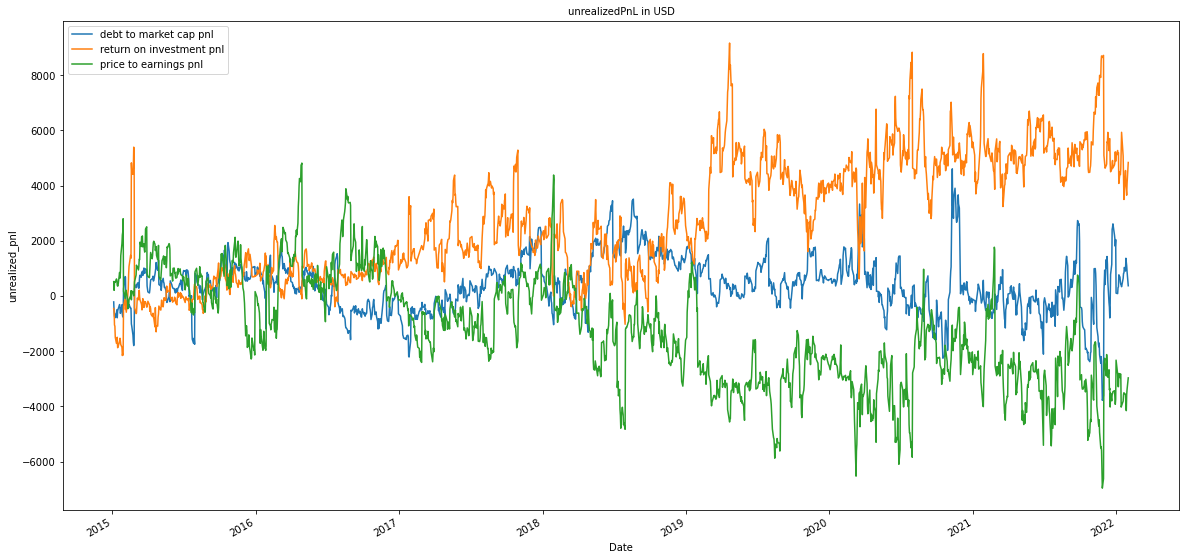

In [146]:
unrealized_pnl.plot.line()
plt.xlabel('Date', fontsize=10)
plt.ylabel('unrealized_pnl', fontsize=10)
plt.title('unrealizedPnL in USD', fontsize=10)
plt.gcf().set_size_inches(20, 10)
plt.show()

### Realized PNL graph for all the 3 individual ratios

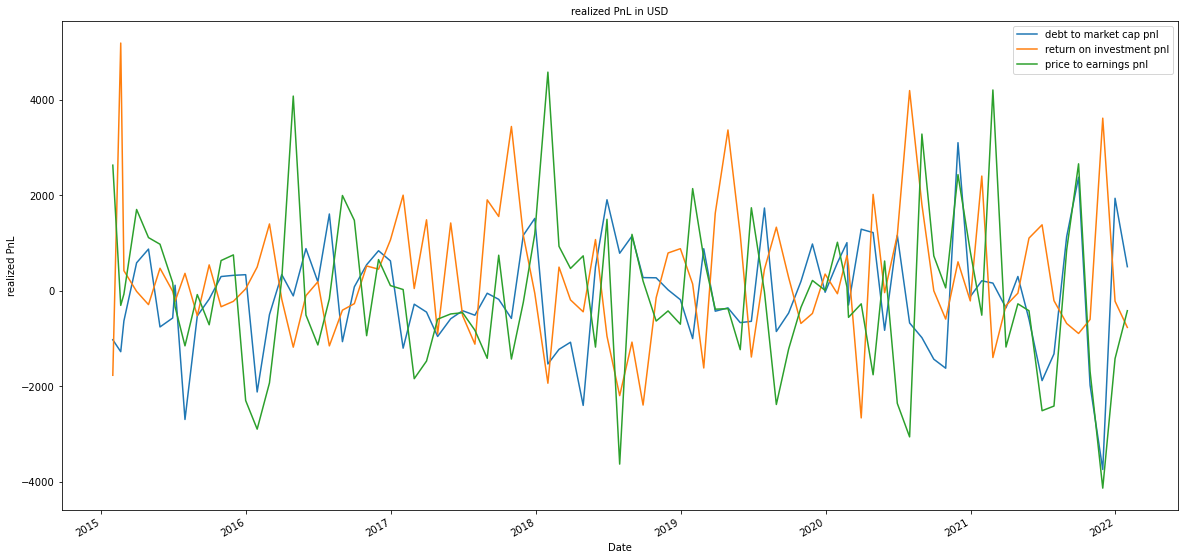

In [147]:
realized_pnl.plot.line()
plt.xlabel('Date', fontsize=10)
plt.ylabel('realized PnL', fontsize=10)
plt.title('realized PnL in USD', fontsize=10)
plt.gcf().set_size_inches(20, 10)
plt.show()

In [150]:
Notional = 100000
Initial_capital = Notional*10

### Return graph for all the 3 individual ratios

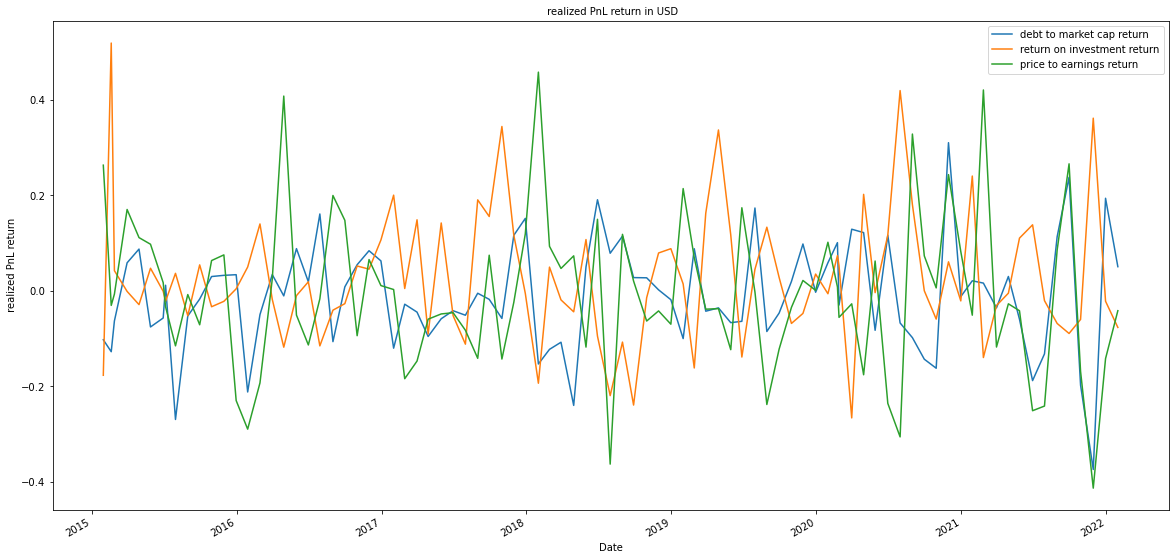

In [153]:
realized_pnl["debt to market cap return"] = realized_pnl1.pnl.dropna()/Initial_capital*100
realized_pnl["return on investment return"] = realized_pnl2.pnl.dropna()/Initial_capital*100
realized_pnl["price to earnings return"] = realized_pnl3.pnl.dropna()/Initial_capital*100

realized_pnl[['debt to market cap return','return on investment return','price to earnings return']].plot.line()
plt.xlabel('Date', fontsize=10)
plt.ylabel(' realized PnL return', fontsize=10)
plt.title(' realized PnL return in USD', fontsize=10)
plt.gcf().set_size_inches(20, 10)
plt.show()

### Z Score funcion to take combination of ratios

In [155]:
def z_score_function(data, sort_by):
    temp = data.loc[:,sort_by].apply(zscore)
    data['total_zscore'] =  temp.sum(axis=1, min_count=1)
    return data.sort_values('total_zscore', ascending = True)

In [163]:
def quantile_strategy_combination_ratio(list1):
 
    Notional = 100000
    Initial_capital = Notional*10
    funding_rate = 2 #(assuming constant 2% funding rate )
    repo_rate = 1 #(funding rate - 100bps)
    realized = None
    unrealized = None
    
    start_date = finaldata[['date','year_month']].reset_index()
    start_date = start_date.groupby(['ticker','year_month'])['date'].min()
    start_date = np.array(start_date.unique())
    
    end_date = finaldata[['date','year_month']].reset_index()
    end_date = end_date.groupby(['ticker','year_month'])['date']
    end_date = end_date.max()
    end_date = np.array(end_date.unique())
    
    trading_days = np.append(end_date, start_date)
    trading_days.sort()
    
    
    
    ratio_column = finaldata[['date','debt to market cap','return on investment', 'price to earnings']]
    ratio_column = ratio_column[ratio_column.date.isin(start_date)].reset_index().set_index('date')
    
    prices = finaldata[['date', 'adj_close']].reset_index().set_index('date') 

    for i in finaldata.year_month.unique():
        z_score_data = z_score_function(ratio_column.loc[i].reset_index(drop = True),sort_by = list1)

        top_20_tickers = z_score_data.ticker[:20]
        long_position = prices[prices.ticker.isin(top_20_tickers)].loc[i].reset_index().drop_duplicates().set_index(['date','ticker'])
        long_position= long_position.unstack()
        long_position = long_position.sum(axis=1)
        longshares = ((Notional/2)/long_position[0])
        long_position = long_position*longshares

        bottom_20_tickers = z_score_data.ticker[:-20]
        short_position = prices[prices.ticker.isin(bottom_20_tickers)].loc[i].reset_index().drop_duplicates().set_index(['date','ticker'])
        short_position= short_position.unstack()
        short_position = short_position.sum(axis=1)
        shortshares = ((Notional/2)/short_position[0])
        short_position = short_position*shortshares


        unrealized_table = pd.DataFrame()
        unrealized_table['Long Positions']= long_position
        unrealized_table['Short Positions'] =  short_position
        unrealized_table['nettrade'] = unrealized_table['Long Positions']-unrealized_table['Short Positions']
        unrealized_table['pnl'] = unrealized_table['nettrade'].diff()
        unrealized_table['pnl'][-1] = (unrealized_table['Short Positions'][-1]-unrealized_table['Long Positions'][-1])
 
        
        realized_table = unrealized_table[unrealized_table.index.isin(trading_days)]
        realized_table['pnl'] = realized_table['nettrade'].diff()

        Notional = Notional*repo_rate + realized_table.pnl[-1]


        if unrealized is None:
            unrealized = unrealized_table
            realized = realized_table
        else:
            unrealized = pd.concat([unrealized,unrealized_table])
            realized = pd.concat([ realized,realized_table])

    unrealized['Cum_PnL'] = unrealized['pnl'].cumsum()
    return realized,unrealized


In [167]:
realized_pnl4,unrealized_pnl4= quantile_strategy_combination_ratio(['debt to market cap','return on investment', 'price to earnings'])

In [176]:
unrealized_pnl["combination"] = unrealized_pnl4.Cum_PnL.dropna()
realized_pnl["combination"] = realized_pnl4.pnl.dropna()

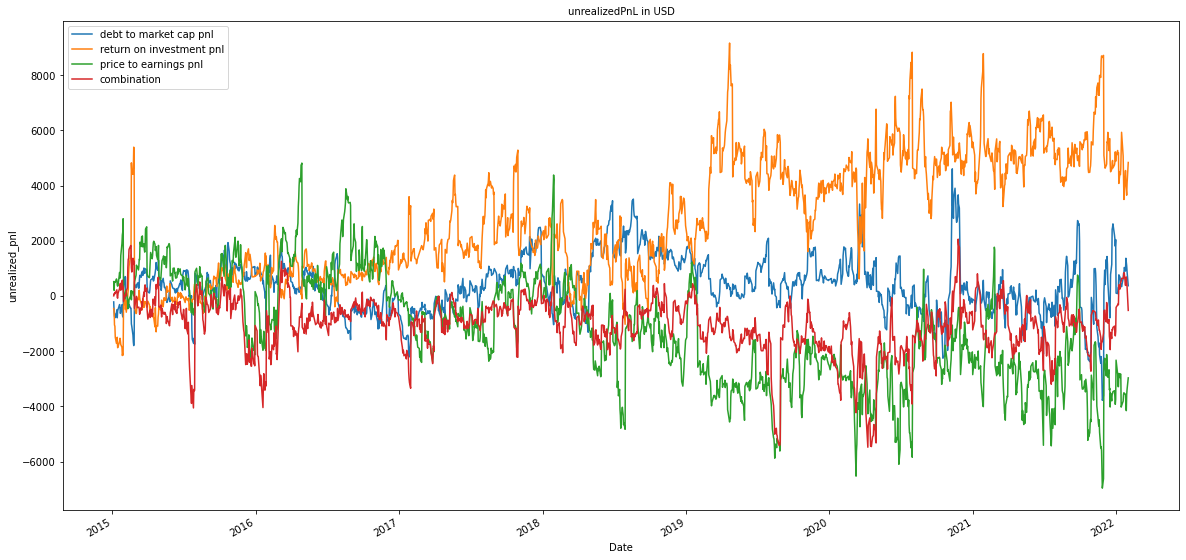

In [177]:
unrealized_pnl.plot.line()
plt.xlabel('Date', fontsize=10)
plt.ylabel('unrealized_pnl', fontsize=10)
plt.title('unrealizedPnL in USD', fontsize=10)
plt.gcf().set_size_inches(20, 10)
plt.show()

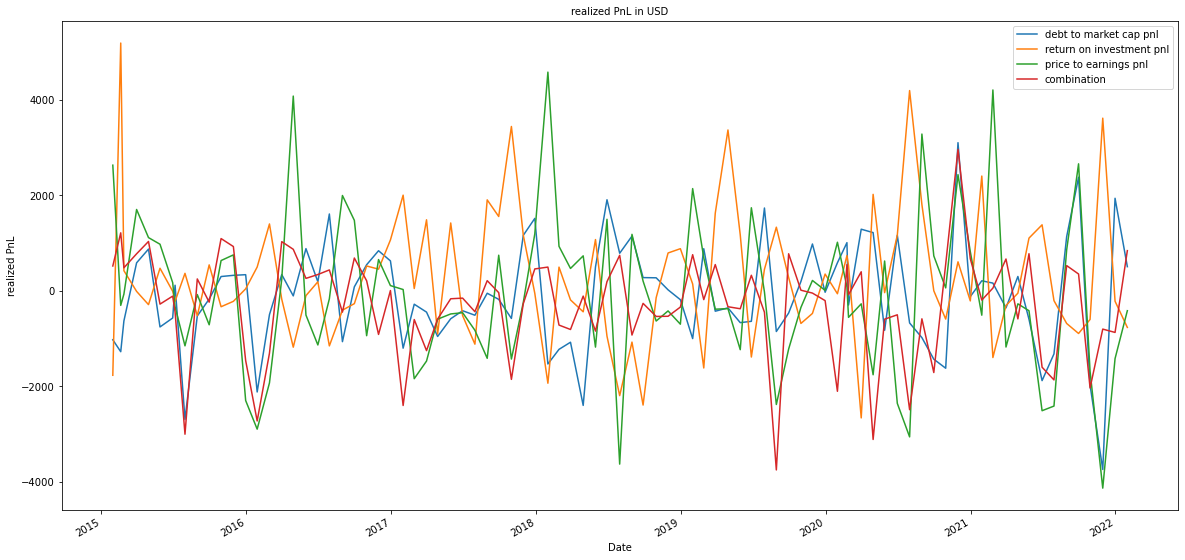

In [178]:
realized_pnl.plot.line()
plt.xlabel('Date', fontsize=10)
plt.ylabel('realized PnL', fontsize=10)
plt.title('realized PnL in USD', fontsize=10)
plt.gcf().set_size_inches(20, 10)
plt.show()

# Inference and Conclusion

 - The Return on Investment ratio PNL graph seems to performing well than the other ratios or combination for the tickers I have chosen. <br><br>
 - In terms of return graph, price to earning followed by return on investment perform better than debt to market cap.<br><br>
 - Return overall seems to be less and not very significant interms of amount.  <br><br>